- flow control
  - 相邻的发送和接收节点之间的节奏
- error detection
  - 由信号衰减和噪声引起的错误。- 接收者检测错误，发出重传信号，或丢弃帧。
- error correction
  - 接收器识别并纠正比特错误，而无需重传。
- half-duplex and full-duplex
  - 在半双工情况下，链路两端的节点都可以传输，但不能同时进行

- 链接层在网络接口卡（NIC）或芯片上实现
- 连接到主机的系统总线
- 硬件、软件、固件的组合

# Error detection, correction
- EDC：错误检测和纠正位（例如，冗余）
- D：受错误检查保护的数据，可能包括头字段
- 错误检测不是百分之百可靠!
  - 协议可能会错过一些错误，但很少
  - 更大的EDC字段产生更好的检测和纠正效果

- Parity checking 奇偶校验
  - 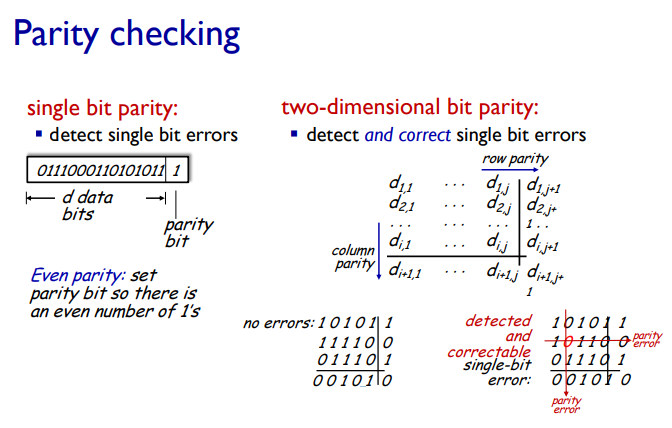

- Cyclic Redundancy Check (CRC) 循环冗余检查
  - 更强大的错误检测编码
  - D：数据位（给定的，把它们看作是一个二进制数字）
  - G：r+1位的比特模式（生成器）
  - 目标：选择r个CRC位，R，使<D,R>正好能被G整除（mod 2）。
    - 接收者知道G，用<D,R>除以G，如果余数不为零：检测到错误
    - 可以检测所有小于r+1比特的突发错误
    - 在实践中广泛使用（以太网、802.11 WiFi）
    - 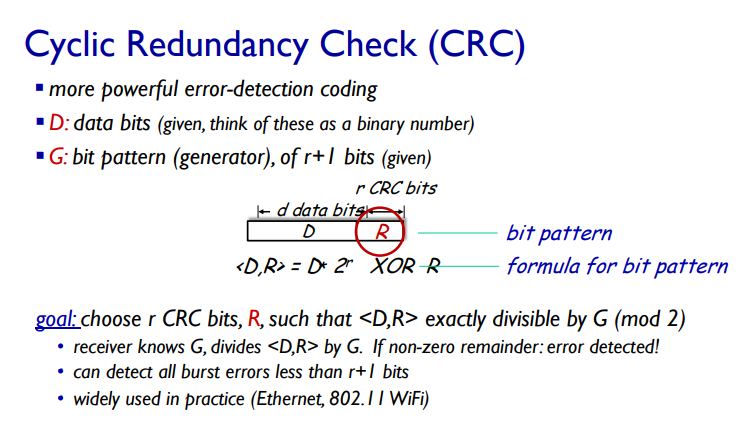
    - 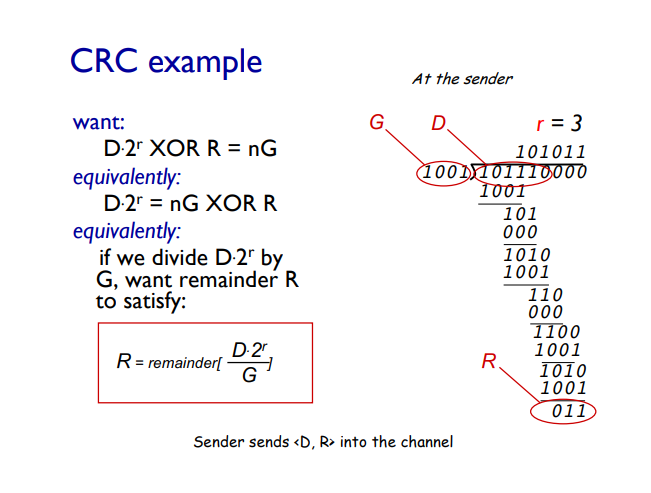
    - 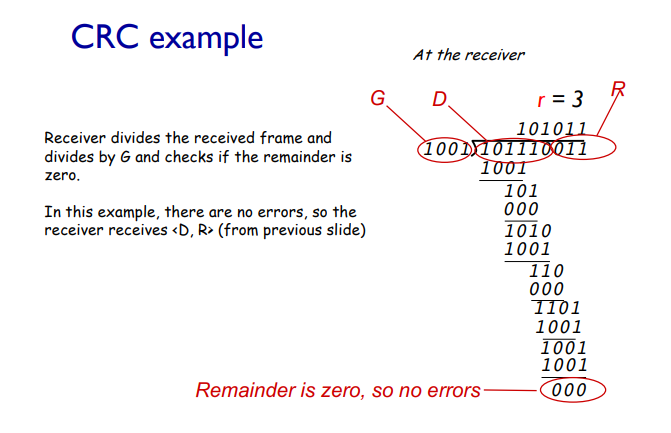

In [5]:
def CRC_sender(D, G):
    D = D << G.bit_length() - 1
    while D.bit_length() >= G.bit_length():
        D ^= G << D.bit_length() - G.bit_length()
    return D

def CRC_receiver(D, G, R):
    D = D << (G.bit_length() - 1)
    D ^= R
    while D.bit_length() >= G.bit_length():
        D ^= G << D.bit_length() - G.bit_length()
    return D

G = 0b1111
D = 0b100010
R = CRC_sender(D, G)

print("Sender: ", bin(R).replace('0b', ''))

print('Receiver: ', bin(CRC_receiver(D, G, R)).replace('0b', ''))
print('Receiver: ', bin(CRC_receiver(0b111110, G, R)).replace('0b', ''))

Sender:  0
Receiver:  0
Receiver:  1


# Multiple access protocols
- 两种类型的 "链接":
  - 点对点
    - 以太网交换机、主机之间的点对点链接
    - 用于拨号访问的PPP
  - 广播（共享电线或介质）
    - 老式的以太网
    - 基于电缆的接入网络中的上游HFC
    - 802.11无线局域网，4G/4G.卫星
- 一个理想的多路存取协议
    - 给定：速率为R bps的多路接入信道（MAC）的理想属性。
    1. 当一个节点想发送时，它可以以R的速率发送。
    2. 当M个节点想发送时，每个节点可以以平均速率R/M发送
    3. 完全分散的
       - 没有专门的节点来协调传输
       - 没有时钟和时隙的同步
    4. 简单

## MAC协议：分类法
- 三个大类:

# **channel partitioning**
  - 将信道分为较小的 "片"（时隙、频率、代码）
  - 将碎片分配给节点，供其独家使用
  - `TDMA` (time division multiple access)
    - 以 "rounds" 为单位访问通道
    - 每个节点在每轮中获得固定长度的槽（长度=数据包传输时间）
    - 未使用的槽位闲置
    - 例子：6个节点的局域网，1,3,4有数据包要发送，2,5,6槽闲置 

  - `FDMA`: frequency division multiple access
    - 信道频谱被划分为多个频段
    - 每个节点分配固定的频段
    - 频段内未使用的传输时间被闲置
    - 示例：6个节点的局域网，1,3,4有数据包要发送，频段2,5,6闲置 
    - letency benefit over TDMA (2 frames can be sent back2back without waiting)

# **random access**
  - 信道不分，允许碰撞
  - 从碰撞中 "恢复"
  - 当节点有数据包要发送时
    - 以全信道数据速率R发送。
    - 节点之间没有先验的协调
  - 两个或更多的传输节点。"碰撞"
  - 随机存取MAC协议规定。
    - 如何检测碰撞
    - 如何从碰撞中恢复（例如，通过延迟重传）。
  - 随机接入MAC协议的例子:
    - ALOHA, slotted ALOHA
    - csma, csma/cd, csma/ca

  - `Slotted ALOHA`
    - 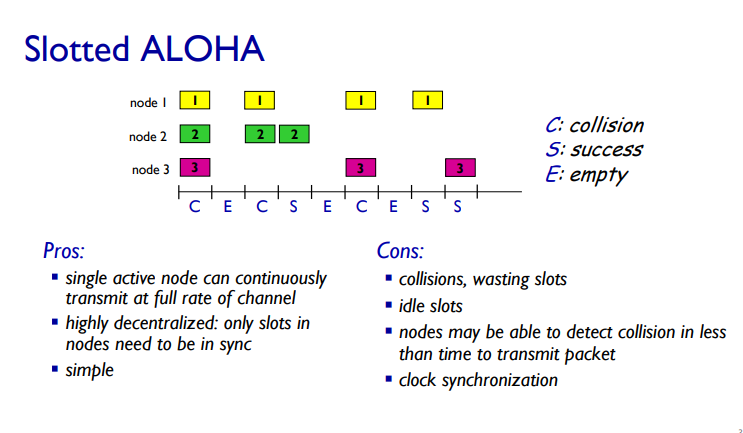
    - 假设:
      - 所有帧的大小相同
      - 时间分为同等大小的时隙（传输1帧的时间）
      - 节点只在槽开始时才开始传输
      - 节点是同步的
      - 如果2个或更多的节点在槽内传输，所有节点都会检测到碰撞
    - 操作:
      - 当节点获得新的帧时，在下一个槽中发送。
      - 如果没有碰撞：节点可以在下一个时隙发送新帧
      - 如果发生碰撞：节点在随后的每个时隙中以概率 p (randomization)重新发送帧，直到成功为止
    - 效率：1/e = 37% 
  
  - `Pure ALOHA`
    - 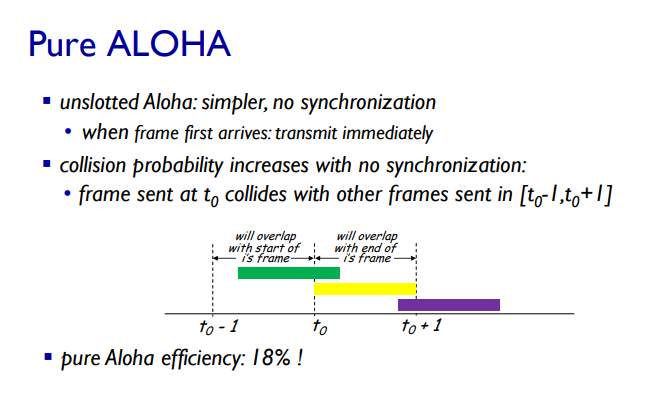
    - 非插槽式Aloha：更简单，无同步性
    - 当帧首次到达时：立即传输
    - 碰撞概率随着无同步而增加
    - 在t0处发送的帧与在[t0-1,t0+1]处发送的其他帧发生碰撞
    - 效率：18%

  - `CSMA` (carrier sense multiple access)
    - 简单的CSMA：在发送前进行监听
    - 如果信道感应到空闲：发送整个帧
    - 如果感觉到信道繁忙：推迟传输
    - 人类的比喻：不要打断别人的讲话!
    - CSMA：碰撞
      - 载波感应仍可能发生碰撞
      - 传播延迟意味着两个节点可能听不到对方刚刚开始的传输
      - 碰撞：浪费了整个数据包的传输时间
      - 距离和传播延迟在确定碰撞概率方面起作用

  - `CSMA/CD` CSMA with collision detection
    - 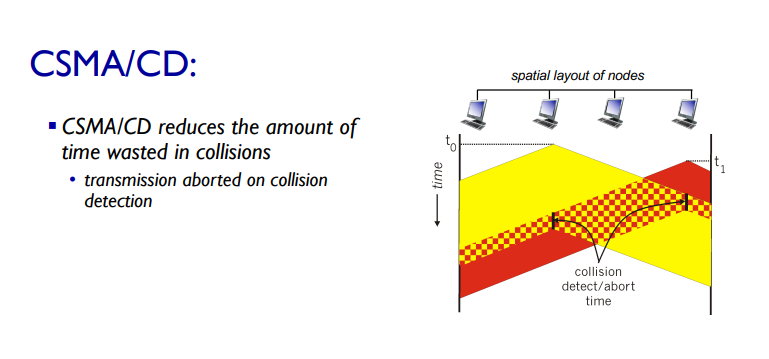
    - 在短时间内检测到碰撞
    - 碰撞的传输被中止，减少信道浪费
    - 碰撞检测在有线网络中很容易，在无线网络中很难。
    - 人类的比喻：有礼貌的谈话者 
    
    - Ethernet CSMA/CD algorithm
      - NIC = 网络接口卡
      1. NIC从网络层接收数据报，创建帧
      2. 如果 NIC 感觉到信道
        - 如果空闲：开始传输帧
        - 如果忙：等待，直到信道空闲，然后传输
      3. 如果 NIC 传输整个帧而没有发生碰撞，则 NIC 完成了帧的传输！
      4. 如果 NIC 在发送过程中检测到另一次传输：中止，发送干扰信号。
      5. 终止后，NIC进入二进制（指数）backoff 退避
          - 在第m次碰撞后，NIC从{0,1,2, ..., 2m-1}中随机选择K。NIC等待K-512比特次数，返回步骤2
          - 更多的碰撞：更长的退避时间间隔 
    
    - Efficiency
      - Tprop = 局域网中2个节点之间的最大支持延迟
      - ttrans = 发送最大尺寸帧的时间
      - 效率上升到1
        - 当Tprop上升到0时
        - 当ttrans达到无穷大时
      - 比ALOHA性能更好：而且简单、便宜、分散

# **Taking Turns**
- look for best of both worlds!
- 节点轮流使用，但有更多需要发送的节点可以轮流使用更长时间

- `polling` 投票
  - 队长节点 "邀请 "其他节点依次传输
  - 通常与 "哑巴 "设备一起使用
  - 担忧:
    - 轮询开销
    - 延迟
    - 单点故障（队长）

- `token passing` 令牌传递
  - 控制令牌按顺序从一个节点传到下一个节点。
  - 令牌信息 
  - 担忧:
    - 令牌开销 
    - 延迟 
    - 单点故障(令牌)


# MAC addresses
- MAC（或LAN或物理或以太网）地址
  - 功能：用于 "本地 "获得从一个接口到另一个接口的帧
  - 物理连接的接口（同一子网，在IP寻址意义上）
  - 48位MAC地址（对于大多数局域网）被刻录在网卡ROM中，有时也可通过软件设置
  - 例如 1a-2F-BB-76-09-AD
    - 十六进制(base 16)符号(每个"数字"代表4位)

- 局域网上的每个接口都
  - 有唯一的48位MAC地址
  - 有一个本地唯一的32位IP地址

- 由IEEE管理的MAC地址分配，制造商购买部分MAC地址空间（以确保唯一性）
  - 比喻：
    - MAC地址：像TFN（SSN）一样
    - IP地址：像邮政地址
  - MAC平面地址：可移植性
    - 可以将接口从一个局域网移动到另一个局域网
    - 回想一下，IP地址不可移植：取决于节点所连接的IP子网

- MAC Address vs. IP Address
  - MAC地址（在链路层中使用）。
    - 适配器建立时在只读存储器中硬编码
    - 48位的扁平名称空间（例如，00-0E-9B-6E-49-76）
    - 携带方便，可以随着主机的移动而保持不变
    - 用来在同一网络的接口之间获取数据包
  - IP地址
    - 动态地学习
    - 32位的分层名称空间（例如，12.178.66.9）
    - 不可移植，取决于主机的连接位置
    - 用于将数据包送到目的地IP子网 


# ARP: address resolution protocol
- ARP表：局域网的每个IP节点（主机、路由器）都有表
  - 一些局域网节点的IP/MAC地址映射。< IP地址；MAC地址；TTL>。
  - TTL（生存时间）：过了这个时间，地址映射将被遗忘（通常是20分钟）
- 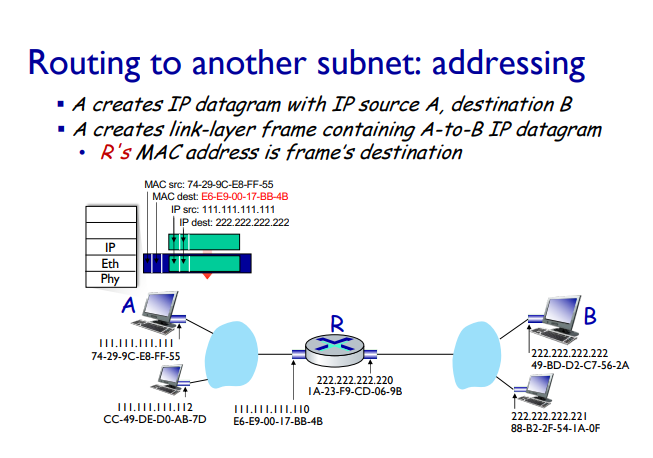
- 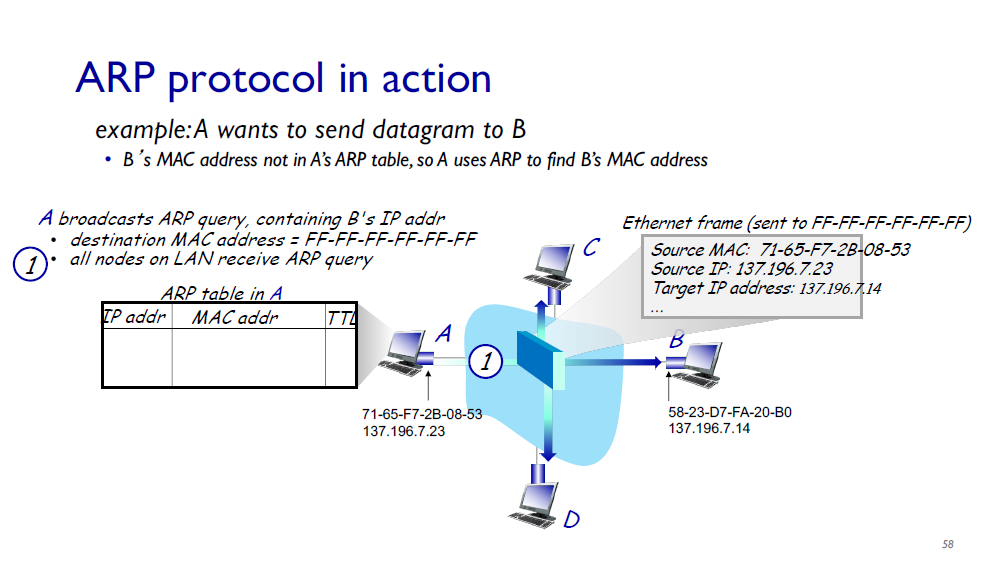
- 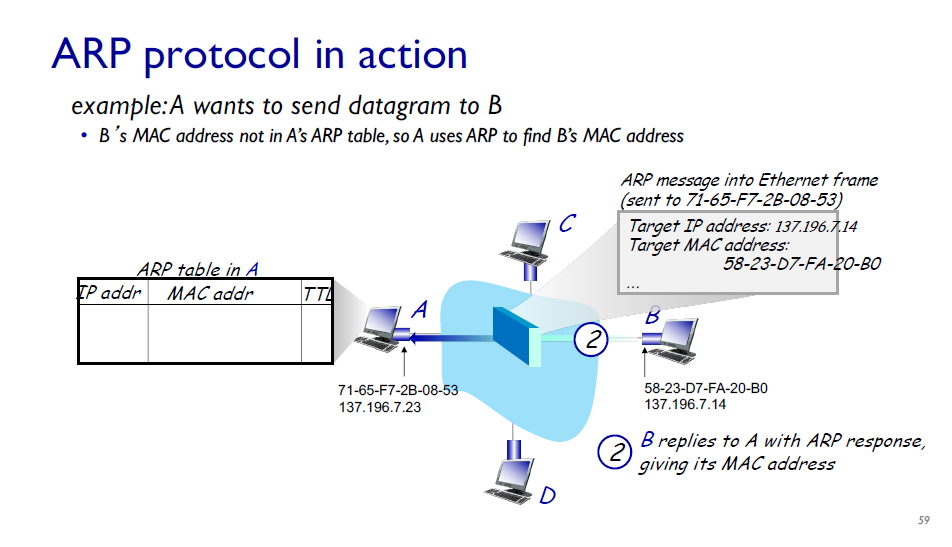
- 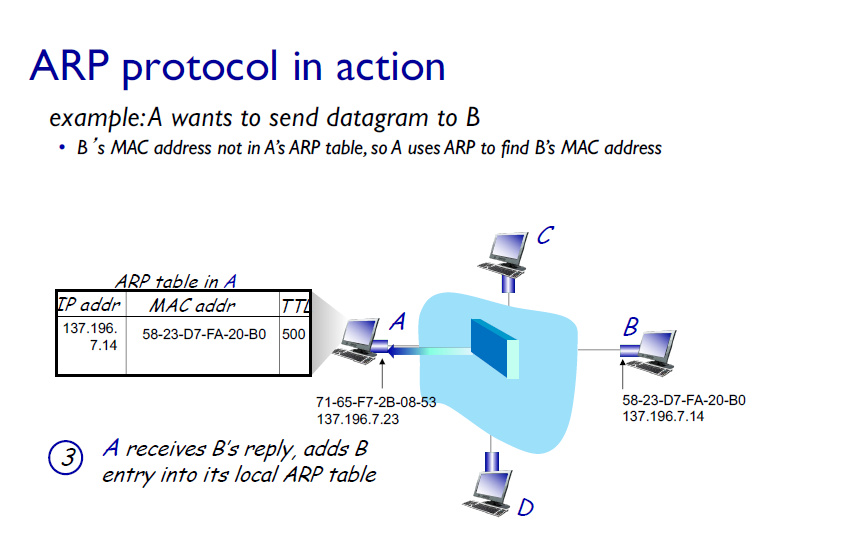

# Ethernet switch
- 交换机是一个链路层设备：它起着积极的作用
  - 存储、转发以太网帧
  - 检查传入帧的MAC地址，当帧要在网段上转发时，选择性地将帧转发到一个或多个传出链路，使用`CSMA/CD`来访问网段
- 透明：主机不知道交换机的存在
- 即插即用，自我学习
  - 交换机不需要被配置

- 同时进行多次传输
  - 主机有专门的、直接的连接到交换机
  - 交换机缓冲数据包
  - 在每个传入的链接上使用以太网协议，因此
    - 没有碰撞；全双工 full duplex
    - 每个链接都是它自己的碰撞域
  - 切换：A到A'和B到B'可以同时传输，没有碰撞
    - 但A到A'和C到A'不可能同时发生

- `Self-learning`
  - 交换机了解哪些主机可以通过哪些接口到达
  - 当收到帧时，交换机 "了解 "发送者的位置：进入的LAN段
  - 在交换机表中记录发件人/位置对
  - 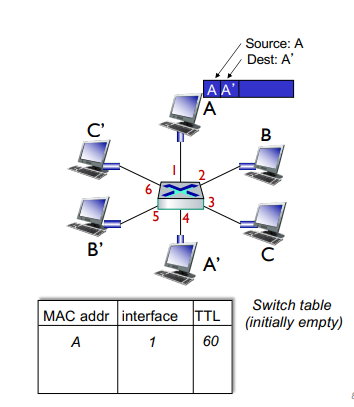
  - 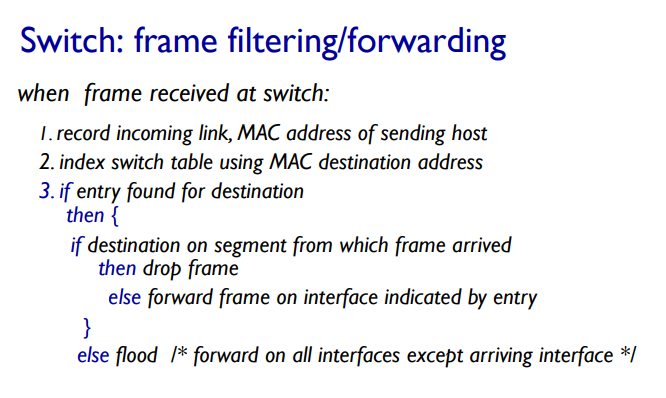
  

# Switches vs. routers
- 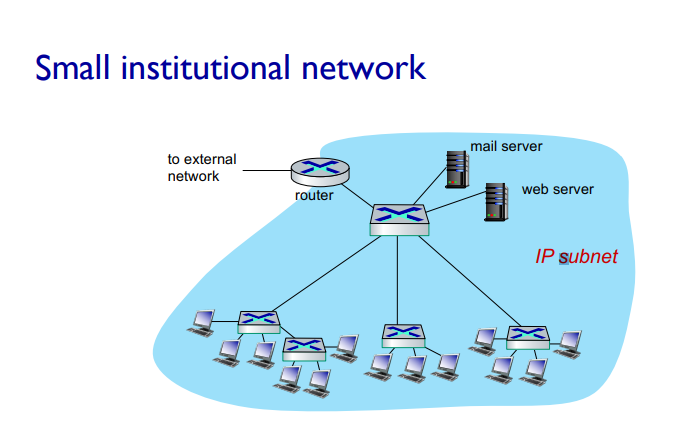
- 两者都是存储和转发。
  - 路由器：网络层设备（检查网络层头）
  - 交换机：链路层设备（检查链路层标头）
- 两者都有转发表。
  - 路由器：使用路由算法和IP地址计算表。
  - 交换机：使用泛洪、学习、MAC地址学习转发表
- 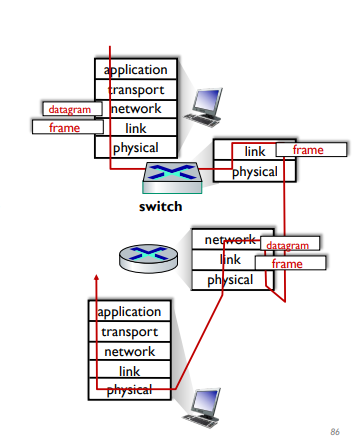